In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/data.csv')

In [4]:
data

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49000,NaN,23-03-05,Chandigarh,Chandigarh,NaN,Residential and others,6.0,15.0,47.0,125.0,Punjab Eng College,NaN,2005-03-23
49001,NaN,25-03-05,Chandigarh,Chandigarh,NaN,Residential and others,NaN,12.0,54.0,161.0,Punjab Eng College,NaN,2005-03-25
49002,NaN,28-03-05,Chandigarh,Chandigarh,NaN,Residential and others,NaN,10.0,116.0,196.0,Punjab Eng College,NaN,2005-03-28
49003,NaN,30-03-05,Chandigarh,Chandigarh,NaN,Residential and others,NaN,9.0,38.0,154.0,Punjab Eng College,NaN,2005-03-30


In [5]:
data.isnull().sum()

,0
stn_code,15764
sampling_date,0
state,0
location,0
agency,16355
type,994
so2,1313
no2,858
rspm,2696
spm,28659


In [6]:
data.shape

(49005, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49005 entries, 0 to 49004
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   stn_code                     33241 non-null  float64
 1   sampling_date                49005 non-null  object 
 2   state                        49005 non-null  object 
 3   location                     49005 non-null  object 
 4   agency                       32650 non-null  object 
 5   type                         48011 non-null  object 
 6   so2                          47692 non-null  float64
 7   no2                          48147 non-null  float64
 8   rspm                         46309 non-null  float64
 9   spm                          20346 non-null  float64
 10  location_monitoring_station  46468 non-null  object 
 11  pm2_5                        0 non-null      float64
 12  date                         49005 non-null  object 
dtypes: float64(6), o

In [8]:
state_means = data.groupby('state')['no2'].mean()

x_axis = state_means.index
y_axis = state_means.values

In [9]:
x_axis

Index(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh'], dtype='object', name='state')

In [10]:
y_axis

array([21.70445056,  5.46969697, 14.79369101, 36.57552511, 21.65126263])

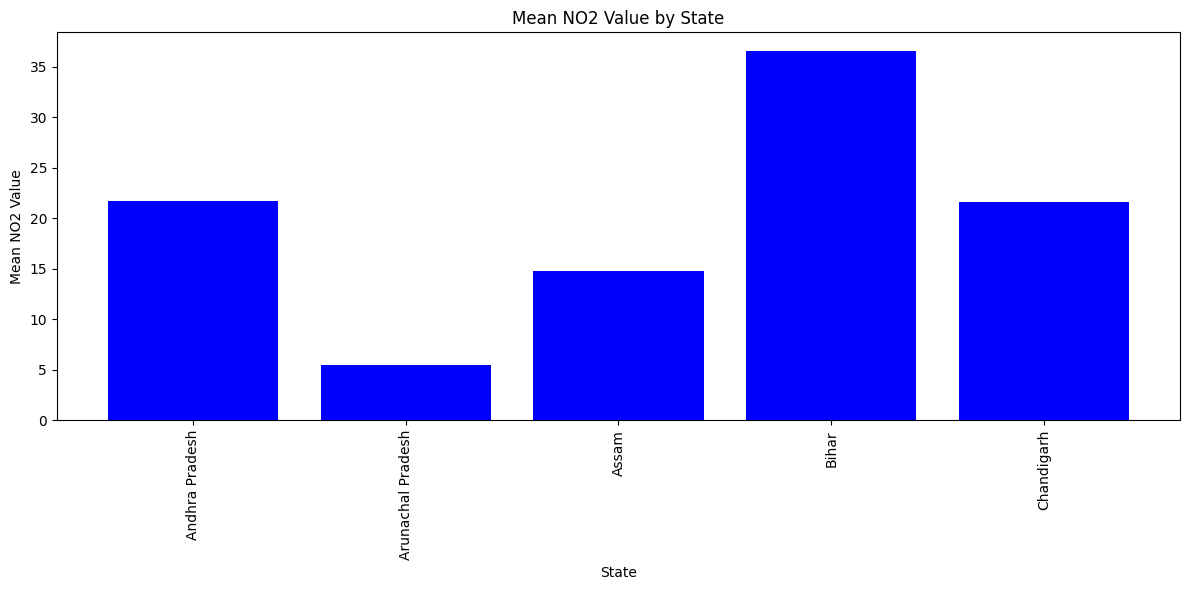

In [11]:
plt.figure(figsize=(12, 6))
plt.bar(x_axis, y_axis, color='blue')
plt.xlabel('State')
plt.ylabel('Mean NO2 Value')
plt.title('Mean NO2 Value by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [12]:
state_means = data.groupby('state')['so2'].mean()

x_axis = state_means.index
y_axis = state_means.values

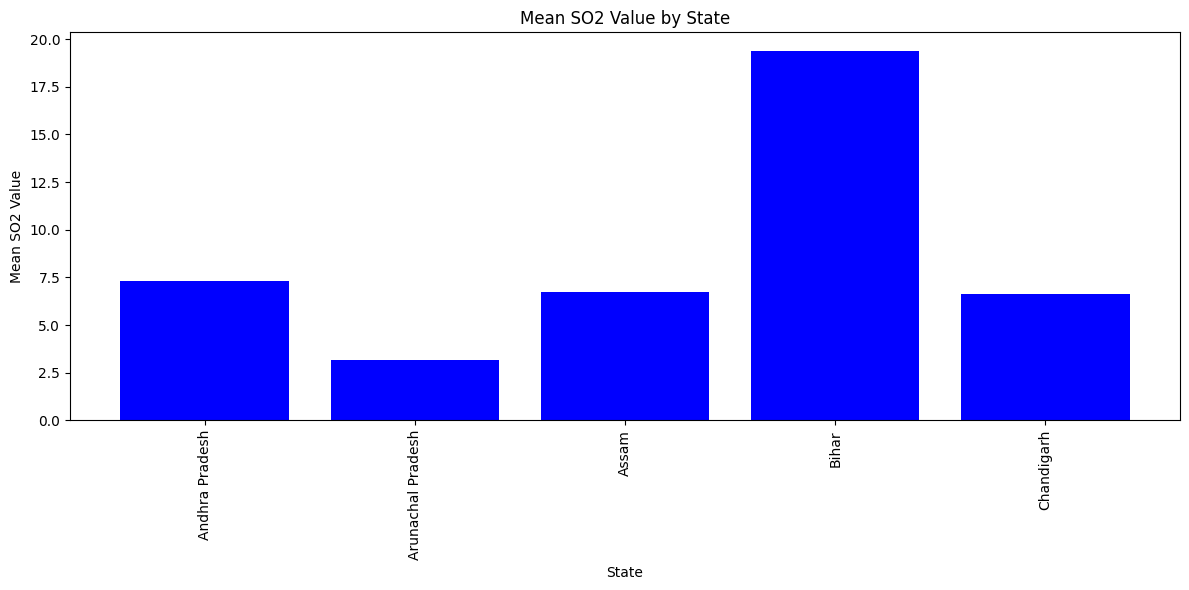

In [13]:
plt.figure(figsize=(12, 6))
plt.bar(x_axis, y_axis, color='blue')
plt.xlabel('State')
plt.ylabel('Mean SO2 Value')
plt.title('Mean SO2 Value by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

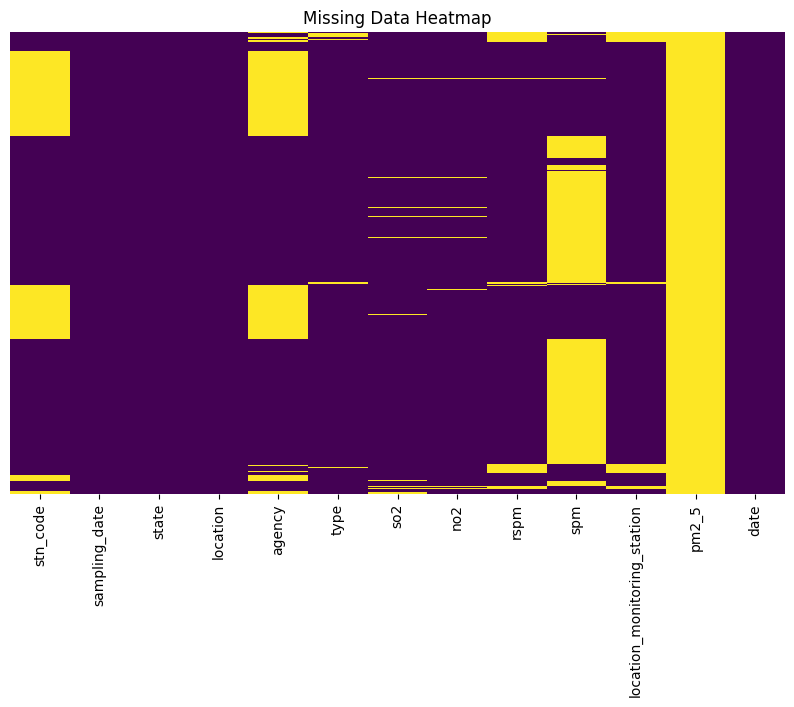

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

<ipython-input-15-1746cf162815>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['sampling_date'] = pd.to_datetime(data['sampling_date'], errors='coerce')


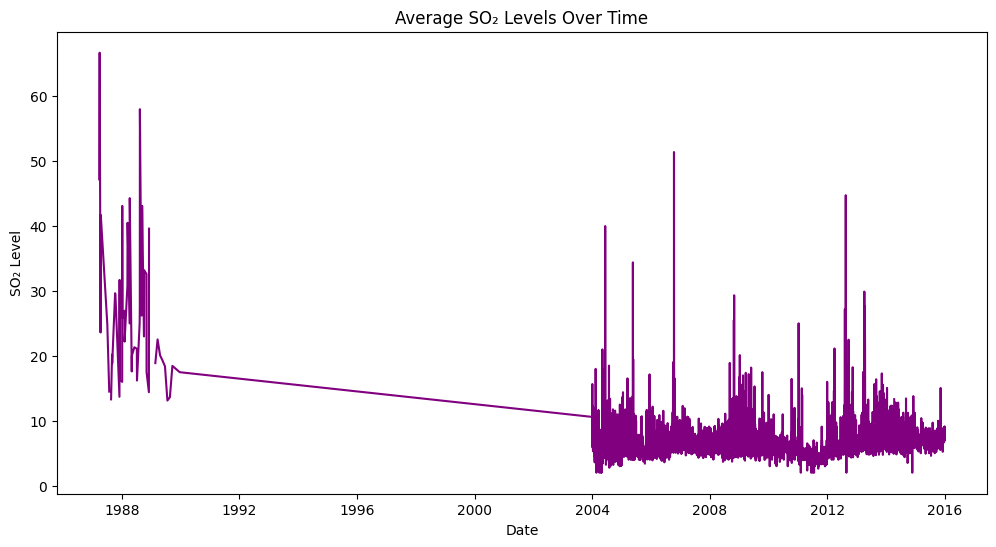

In [15]:
data['sampling_date'] = pd.to_datetime(data['sampling_date'], errors='coerce')
plt.figure(figsize=(12, 6))
plt.plot(data.groupby('sampling_date')['so2'].mean(), color='purple')
plt.title("Average SO₂ Levels Over Time")
plt.xlabel("Date")
plt.ylabel("SO₂ Level")
plt.show()

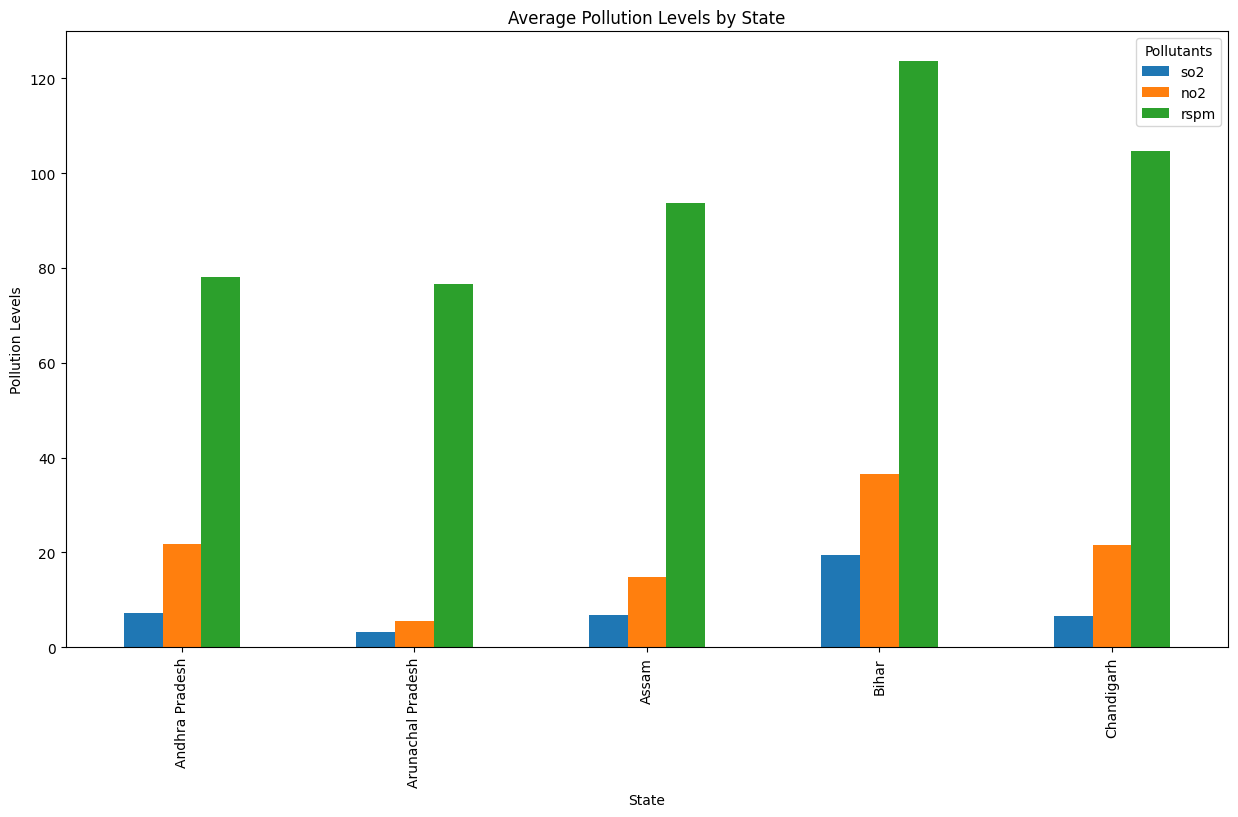

In [16]:
pollutants = ['so2', 'no2', 'rspm']
avg_pollution = data.groupby('state')[pollutants].mean().dropna()
avg_pollution.plot(kind='bar', figsize=(15, 8))
plt.title("Average Pollution Levels by State")
plt.xlabel("State")
plt.ylabel("Pollution Levels")
plt.legend(title="Pollutants")
plt.show()


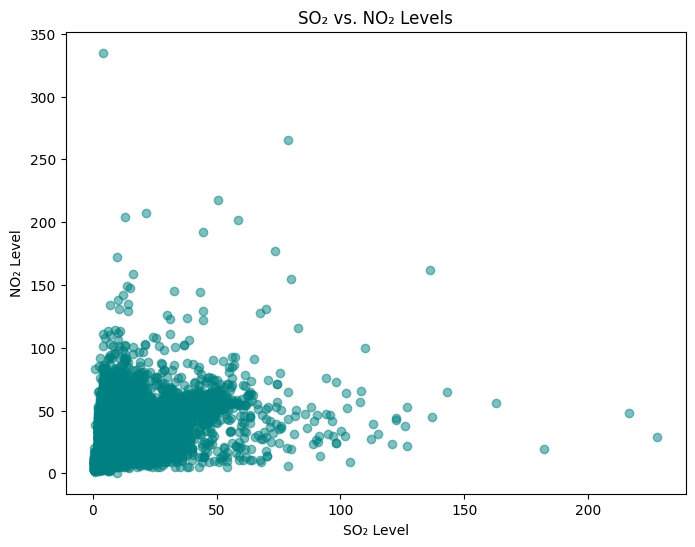

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(data['so2'], data['no2'], alpha=0.5, color='teal')
plt.title("SO₂ vs. NO₂ Levels")
plt.xlabel("SO₂ Level")
plt.ylabel("NO₂ Level")
plt.show()